In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/Users/qiqi/Desktop/EE0005AI/EE0005miniprj'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preparation

## 1.1 Data Exploration

In [3]:
weather_df = pd.read_csv('weatherAUS.csv')

In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No



## 1.2 Check the target variable (RainTomorrow)

In [6]:
# Check unique observations in the target col.
weather_df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

<font color=darkblue>**This means that the target variable contains missing values.**</font>

In [7]:
# Number of the missing values.
weather_df['RainTomorrow'].isnull().sum()

3267

In [8]:
# 加一个柱状图！！！！！！！！！

In [9]:
# Check the percentage of missing values.
weather_df['RainTomorrow'].isnull().mean()*100

2.245978275814657

<font color=darkblue>**Since it is a relatively small amount of missing value compared to the whole dataset, and it is unreasonable to fill in random values, we choose to delete rows of these missing values from the dataset.**

In [10]:
weather_df.dropna(subset=['RainTomorrow'], inplace=True)

In [11]:
# Check the percentage of missing value again.
weather_df['RainTomorrow'].isnull().mean()*100

0.0

In [12]:
weather_df.reset_index(drop=True, inplace=True) # Reindex

## 1.3 Seperating Numeric and Categorical Variables

In [13]:
# Select numeric variables
numeric = []
for cols in weather_df.columns:
    if weather_df[cols].dtype == 'float64':
        numeric.append(cols)

In [14]:
# Viewing numberic variables
weather_df[numeric].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [15]:
# Select Categorical variables
categorical = []
for cols in weather_df.columns:
    if weather_df[cols].dtype == 'object':
        categorical.append(cols)

In [16]:
weather_df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


## 1.4 Handle Categorical Data

In [17]:
# Counting missing values of each var.
weather_df[categorical].isnull().sum()  

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

### 1.4.1 Separate 'Date' into Year, Month, Day

In [18]:
# Convert the Date variable from string to date format.
weather_df['Date']=pd.to_datetime(weather_df['Date'])

In [19]:
# Creating Year, Month and Day cols in weather_df
weather_df['Year']=weather_df['Date'].dt.year
weather_df['Month']=weather_df['Date'].dt.month
weather_df['Day']=weather_df['Date'].dt.day

In [20]:
# Drop the original Date variable
weather_df.drop(columns='Date', inplace=True)

In [21]:
weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### 1.4.2 Imputation of missing values in categorical data (Wind Direction & Rain Today)

#### Wind Direction

In [22]:
# Extract the three cols of Wind Direction. Then convert them to Boolean Truth Table.
Wind_truthTable = pd.concat([pd.DataFrame(weather_df['WindGustDir'].isnull()), 
           pd.DataFrame(weather_df['WindDir9am'].isnull()), 
           pd.DataFrame(weather_df['WindDir3pm'].isnull())], axis=1)
Wind_truthTable

,WindGustDir,WindDir9am,WindDir3pm
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
142188,False,False,False
142189,False,False,False
142190,False,False,False
142191,False,False,False


In [23]:
# Finding out the rows with more than 1 WindDir loss. (By Boolean Algebra.)
Over_one_missing = Wind_truthTable[(Wind_truthTable['WindGustDir']==True)*(Wind_truthTable['WindDir3pm']==True) +
                      (Wind_truthTable['WindDir3pm']==True)*(Wind_truthTable['WindDir9am']==True) +
                      (Wind_truthTable['WindGustDir']==True)*(Wind_truthTable['WindDir9am']==True)]

In [24]:

Over_one_missing.shape

(4107, 3)

In [25]:
Over_one_missing # True means that the correspond entry is missing. 

,WindGustDir,WindDir9am,WindDir3pm
63,True,False,True
64,True,True,True
181,False,True,True
289,False,True,True
515,False,True,True
...,...,...,...
141823,True,True,True
141824,True,True,True
141825,True,True,True
141826,True,True,True


<font color=darkblue>**We find that the number of rows missing two or three Wind Direction observations in the overall dataset in about 4,000, which is small compared to the entire datatset. Thus, we choose to delete these rows.**

In [26]:
# Deleting rows with 2 or 3 missing wind data.
weather_df.drop(Over_one_missing.index, inplace=True) 

In [27]:
weather_df.reset_index(drop=True, inplace=True) # Reindex

<font color=darkblue>**Now we have a clearer dataset with maximum one missing Wind data. We will process to determine how we should deal with these missing values.**

In [28]:
# Check countings of different observations in WindGustDir
weather_df.WindGustDir.value_counts() 

W      9762
SE     9300
E      9058
N      9014
SSE    8974
S      8933
WSW    8878
SW     8776
SSW    8595
WNW    8044
NW     7991
ENE    7973
ESE    7288
NE     7039
NNW    6544
NNE    6412
Name: WindGustDir, dtype: int64

In [29]:
# Check countings of different observations in WindDir9am
weather_df.WindDir9am.value_counts() 

N      11306
SE      8989
E       8965
SSE     8941
S       8421
NW      8248
W       8182
SW      8101
NNE     7926
NNW     7803
ENE     7704
ESE     7531
NE      7390
SSW     7372
WNW     7163
WSW     6801
Name: WindDir9am, dtype: int64

In [30]:
# Check countings of different observations in WindDir3pm
weather_df.WindDir3pm.value_counts() 

SE     10227
W       9882
S       9573
WSW     9309
SW      9127
SSE     9123
WNW     8638
N       8638
NW      8350
ESE     8346
E       8310
NE      8056
SSW     7992
NNW     7711
ENE     7705
NNE     6429
Name: WindDir3pm, dtype: int64

In [31]:
(weather_df['WindGustDir'] == weather_df['WindDir9am']).sum()

28053

In [32]:
(weather_df['WindGustDir'] == weather_df['WindDir3pm']).sum()

41536

In [33]:
(weather_df['WindDir9am'] == weather_df['WindDir3pm']).sum()

23235

<font color=darkblue>Since there are over 10,000 data missing, we cannot simply delete all of them. One of the common but easy method to deal with missing categorical variables is just filling them with the most frequently appeared observation. However, we find that the counting of different observartions are really close to each other, thus, we decided to use a more reasonable way to fill them, i.e., filling the missing wind direction by observations nearby. This filling mechanism also has reasonable meaning in practice, which is based on wind observations from each day.

Based on statistics, we decided to:
1. fill WindGustDir by WindDir3pm, and vice versa;
2. fill WindDir9am by WindGustDir.

In [34]:
# fill na as dicussed above
weather_df.WindGustDir=weather_df.WindGustDir.fillna(weather_df.WindDir3pm)
weather_df.WindDir3pm=weather_df.WindDir3pm.fillna(weather_df.WindGustDir)
weather_df.WindDir9am=weather_df.WindDir9am.fillna(weather_df.WindGustDir)

In [35]:
# Check number of missing values again
weather_df[['WindGustDir', 'WindDir9am', 'WindDir3pm']].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

<font color=darkblue>**Now we have a dataset with no missing Wind data.**

#### Rain Today

In [36]:
# Check number of missing values
weather_df['RainToday'].isnull().sum()

1282

In [37]:
# Show distribution of observations
weather_df['RainToday'].value_counts()

No     106350
Yes     30454
Name: RainToday, dtype: int64

Here, since number of 'No' observations overweigh 'Yes', we choose to fill the missing values with the most frequent observation, which is 'No'.

In [38]:
# Fill missing values with the most frequent observation, i.e. 'No'
weather_df['RainToday'].fillna(weather_df['RainToday'].mode()[0], inplace=True)

In [39]:
# Check missing values again
weather_df['RainToday'].isnull().sum()

0

## 1.5 Handle Numberic Data

In [40]:
# check missing values of each numeric var
weather_df[numeric].isnull().sum()

MinTemp            267
MaxTemp            127
Rainfall          1282
Evaporation      57888
Sunshine         64367
WindGustSpeed     5492
WindSpeed9am       278
WindSpeed3pm       203
Humidity9am       1356
Humidity3pm       1841
Pressure9am      11356
Pressure3pm      11299
Cloud9am         52433
Cloud3pm         54508
Temp9am            551
Temp3pm           1011
dtype: int64

In [41]:
# check the distribution of each numeric var
round(weather_df[numeric].describe())

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,137819.0,137959.0,136804.0,80198.0,73719.0,132594.0,137808.0,137883.0,136730.0,136245.0,126730.0,126787.0,85653.0,83578.0,137535.0,137075.0
mean,12.0,23.0,2.0,5.0,8.0,40.0,14.0,19.0,69.0,51.0,1018.0,1015.0,4.0,5.0,17.0,22.0
std,6.0,7.0,8.0,4.0,4.0,14.0,9.0,9.0,19.0,21.0,7.0,7.0,3.0,3.0,7.0,7.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.0,977.0,0.0,0.0,-7.0,-5.0
25%,8.0,18.0,0.0,3.0,5.0,31.0,7.0,13.0,57.0,36.0,1013.0,1010.0,1.0,2.0,12.0,17.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,1018.0,1015.0,5.0,5.0,17.0,21.0
75%,17.0,28.0,1.0,7.0,11.0,48.0,19.0,24.0,83.0,65.0,1022.0,1020.0,7.0,7.0,22.0,26.0
max,34.0,48.0,371.0,86.0,14.0,135.0,87.0,87.0,100.0,100.0,1041.0,1040.0,9.0,9.0,40.0,47.0


In [42]:
# 画个长长的box plot

### 1.5.1 Imputation of Missing Numerical Values

In [43]:
# median imputation
for col in numeric:
    weather_df[col].fillna(weather_df[col].median(), inplace=True)

In [44]:
# check missing value after imputation
weather_df[numeric].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### 1.5.2 Process Outliers of Numerical Values

In [45]:
# 画五个的分布图

In [46]:
# find outlier boundaries
colms=['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
for col in colms:
    IQR = weather_df[col].quantile(0.75) - weather_df[col].quantile(0.25)
    Lower = weather_df[col].quantile(0.25) - (IQR * 3)
    Upper = weather_df[col].quantile(0.75) + (IQR * 3)
    print(col+' outliers are values < {lowerboundary} or > {upperboundary}'.
          format(lowerboundary=Lower, upperboundary=Upper))

Rainfall outliers are values < -1.7999999999999998 or > 2.4
Evaporation outliers are values < -0.20000000000000107 or > 9.600000000000001
WindGustSpeed outliers are values < -14.0 or > 91.0
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


In [47]:
# replace outliers with boundary values
weather_df['Rainfall']=np.where(weather_df['Rainfall']>2.4, 2.4, weather_df['Rainfall'])
weather_df['Evaporation']=np.where(weather_df['Evaporation']>9.6, 9.6, weather_df['Evaporation'])
weather_df['WindGustSpeed']=np.where(weather_df['WindGustSpeed']>91, 91, weather_df['WindGustSpeed'])
weather_df['WindSpeed9am']=np.where(weather_df['WindSpeed9am']>55, 55, weather_df['WindSpeed9am'])
weather_df['WindSpeed3pm']=np.where(weather_df['WindSpeed3pm']>57, 57, weather_df['WindSpeed3pm'])

In [48]:
# check values after replacement
weather_df[colms].max()

Rainfall          2.4
Evaporation       9.6
WindGustSpeed    91.0
WindSpeed9am     55.0
WindSpeed3pm     57.0
dtype: float64

## 1.6 Declare Predictors and Target

In [49]:
X=weather_df.drop(columns=['RainTomorrow'])
y=weather_df['RainTomorrow']
y=pd.DataFrame(y)

## 1.7 Split Train and Test set

In [50]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.7,1007.1,8.0,5.0,16.9,21.8,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1010.6,1007.8,5.0,5.0,17.2,24.3,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1007.6,1008.7,5.0,2.0,21.0,23.2,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,1017.6,1012.8,5.0,5.0,18.1,26.5,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138081,Uluru,3.5,21.8,0.0,4.8,8.5,E,31.0,ESE,E,...,1024.7,1021.2,5.0,5.0,9.4,20.9,No,2017,6,20
138082,Uluru,2.8,23.4,0.0,4.8,8.5,E,31.0,SE,ENE,...,1024.6,1020.3,5.0,5.0,10.1,22.4,No,2017,6,21
138083,Uluru,3.6,25.3,0.0,4.8,8.5,NNW,22.0,SE,N,...,1023.5,1019.1,5.0,5.0,10.9,24.5,No,2017,6,22
138084,Uluru,5.4,26.9,0.0,4.8,8.5,N,37.0,SE,WNW,...,1021.0,1016.8,5.0,5.0,12.5,26.1,No,2017,6,23


In [51]:
y.value_counts()

RainTomorrow
No              107282
Yes              30804
dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
28679,Sydney,8.1,21.0,0.0,3.6,9.7,N,35.0,WNW,N,...,1026.5,1021.5,1.0,0.0,9.8,20.4,No,2012,7,17
62152,MelbourneAirport,4.9,15.5,0.0,4.2,6.4,N,78.0,N,N,...,1026.8,1021.0,7.0,7.0,10.2,14.3,No,2015,7,21
51331,Ballarat,3.0,16.3,0.2,4.8,8.5,N,44.0,N,N,...,1025.1,1021.9,8.0,5.0,9.3,15.9,No,2010,5,1
16793,NorahHead,21.6,28.8,0.0,4.8,8.5,NE,43.0,S,NE,...,1012.3,1008.1,5.0,5.0,23.2,24.7,No,2013,1,17
34394,WaggaWagga,9.1,19.0,0.0,4.8,6.4,SW,48.0,WNW,W,...,1010.2,1008.7,6.0,5.0,13.3,18.1,No,2011,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,Canberra,16.0,23.8,2.2,5.4,6.2,SSE,30.0,SE,ESE,...,1018.9,1017.1,8.0,7.0,16.5,22.9,Yes,2008,2,1
97639,Nuriootpa,6.8,14.3,0.4,4.4,1.7,WSW,33.0,WNW,WSW,...,1021.5,1020.4,8.0,8.0,8.8,12.4,No,2010,10,17
95939,MountGambier,0.9,11.3,0.0,1.4,1.5,NE,28.0,NE,ENE,...,1021.6,1017.2,7.0,7.0,4.4,10.4,No,2014,7,23
117952,SalmonGums,17.7,36.5,0.0,4.8,8.5,NNW,48.0,NNE,ENE,...,1017.6,1015.2,5.0,5.0,26.4,35.7,No,2012,1,21


In [54]:
#reindex train and test sets
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

## 4.1 One Hot Encoding of Categorical Variables

In [55]:
# RainToday
pd.get_dummies(weather_df.RainToday).head()
# This is just an illustration of the result of One Hot Encoding.

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [56]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)

var_list = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']

# One hot encode X_train
for var in var_list:
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[[var]]))
    X_train_encoded.columns = encoder.get_feature_names([var])
    X_train.drop([var] ,axis=1, inplace=True)
    X_train=pd.concat([X_train_encoded, X_train], axis=1)
    
X_train

,RainToday_No,RainToday_Yes,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,34.0,1026.5,1021.5,1.0,0.0,9.8,20.4,2012,7,17
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,54.0,1026.8,1021.0,7.0,7.0,10.2,14.3,2015,7,21
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,66.0,1025.1,1021.9,8.0,5.0,9.3,15.9,2010,5,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,77.0,1012.3,1008.1,5.0,5.0,23.2,24.7,2013,1,17
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,1010.2,1008.7,6.0,5.0,13.3,18.1,2011,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110463,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49.0,1018.9,1017.1,8.0,7.0,16.5,22.9,2008,2,1
110464,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,1021.5,1020.4,8.0,8.0,8.8,12.4,2010,10,17
110465,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,1021.6,1017.2,7.0,7.0,4.4,10.4,2014,7,23
110466,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,1017.6,1015.2,5.0,5.0,26.4,35.7,2012,1,21


In [57]:
# One hot encode X_test
for var in var_list:
    X_test_encoded = pd.DataFrame(encoder.fit_transform(X_test[[var]]))
    X_test_encoded.columns = encoder.get_feature_names([var])   
    X_test.drop([var] ,axis=1, inplace=True)
    X_test=pd.concat([X_test_encoded, X_test], axis=1)

In [58]:
X_test

,RainToday_No,RainToday_Yes,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,1024.7,1020.8,0.0,0.0,16.0,23.5,2016,5,11
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,1010.5,1010.9,1.0,7.0,27.3,28.7,2015,12,11
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,1023.9,1022.9,5.0,5.0,13.6,17.9,2014,4,2
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.0,1026.3,1022.0,5.0,5.0,15.2,22.4,2014,1,7
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,1017.1,1015.4,1.0,4.0,18.8,22.9,2014,10,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27613,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,20.0,1010.9,1007.4,5.0,5.0,26.9,34.2,2017,2,13
27614,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,1017.9,1014.9,3.0,7.0,24.4,24.8,2014,5,27
27615,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,51.0,1018.3,1010.3,5.0,5.0,13.8,21.4,2014,5,27
27616,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,60.0,1019.2,1018.0,7.0,7.0,22.8,22.9,2015,12,24


<font color=blue>***We now finished the data preparation!***</font>

# 2. Decesion Tree

## 2.1 Train the model without parameters tuning

In [63]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

dectree=DecisionTreeClassifier(random_state=5
                                ,max_depth=30               #Randomly select a depth for decesion tree
                                #,splitter='random'
                                # ,min_samples_leaf=2
                                #,min_samples_split=15 
                                 )                          #Create the decision tree object
dectree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, random_state=5)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9970398667487417

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7928886957781157



<AxesSubplot:>

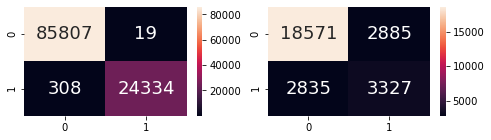

In [66]:
# Predict RainTomorrow values
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(8, 2))

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

<font color=blue>**Obviously, there is an issue of overfitting!**</font>

In [61]:
# Check feature importances

# Saving feature names for later use
feature_list = list(X_train.columns)
# Get numerical feature importances
importances = list(dectree.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Feature: Humidity3pm                    Importance: 0.2724
Feature: WindGustSpeed                  Importance: 0.0634
Feature: Pressure3pm                    Importance: 0.0579
Feature: Sunshine                       Importance: 0.0442
Feature: MinTemp                        Importance: 0.0363
Feature: Humidity9am                    Importance: 0.0356
Feature: Pressure9am                    Importance: 0.0328
Feature: Day                            Importance: 0.0311
Feature: Temp3pm                        Importance: 0.0298
Feature: Temp9am                        Importance: 0.0296
Feature: MaxTemp                        Importance: 0.0274
Feature: WindSpeed3pm                   Importance: 0.027
Feature: Rainfall                       Importance: 0.0248
Feature: WindSpeed9am                   Importance: 0.0247
Feature: Month                          Importance: 0.0215
Feature: Year                           Importance: 0.02
Feature: Evaporation                    Importance: 0.0198


<font color=blue>***Humidity3pm is the most important feature!***</font>

## 2.2 Hyperparameter Tuning of Decision Trees

<font color=darkblue>Due to the cost of time, we are not going to apply Grid Search for all the hyperparameters altogether. While, this method is still included in the last part of 2.2. We decide to use various techniques to explore the optimized hyperparamters.The hyperparameters which we are going to tune are listed below with the corresponding techniques applied:
1. max_depth (cross_validation learning curve)
2. min_samples_leaf (Grid Search)
3. min_samples_split (Grid Search)
4. max_features (Grid Search)

### 2.2.1 max_depth (cross_validation learning curve)

<font color=blue>***In order to minimise the influence of the split of the train and test dataset, we use cross validation(Stratified K-fold cross-validation) to observe the stability of the Decesion Tree model.***</font>

In [62]:
from sklearn.model_selection import cross_val_score

# Convert the dataframe to numpy arrays. cross_val_score only accepts array or list inputs. 
X_train_array=X_train.to_numpy()

y_train_array=y_train.to_numpy()
y_train_array = y_train_array.flatten()
# Concvert y to 1D array

In [63]:
# Check the input array
X_train_array

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 7.000e+00,
        1.700e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.015e+03, 7.000e+00,
        2.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.010e+03, 5.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.014e+03, 7.000e+00,
        2.300e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 1.000e+00,
        2.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.013e+03, 4.000e+00,
        1.400e+01]])

Highet Classification Accuracy 		: 0.8409132036227087
Corresponding Depth of Decesion Tree 	: 8


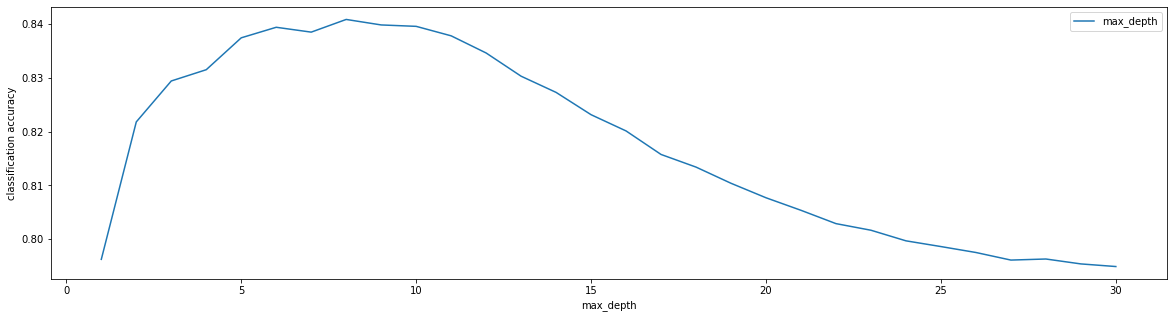

In [64]:
# Learning curve for max_depth
scorelist = []
for i in range(0,30):
    dectree = DecisionTreeClassifier(max_depth=i+1
                                    ,random_state=5
                                    ,criterion='entropy'
                                    #,splitter="random"
                                    )

    score = cross_val_score(dectree,X_train_array,y_train_array,cv=10).mean()               #cv=10 cross validation 10 times
    scorelist.append(score)


    
print("Highet Classification Accuracy \t\t:",max(scorelist))
print("Corresponding Depth of Decesion Tree \t:",(scorelist.index(max(scorelist))+1))
plt.figure(figsize=[20,5])
plt.plot(range(1,31),scorelist,label="max_depth")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('classification accuracy')
plt.show()

<font color=blue>***We decide to use max_depth=8 in the following models.***

### 2.2.2 min_samples_leaf (Grid Search)

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [109]:
# Set the range for min_samples_leaf to apply Grid Search
param_grid1 = {'min_samples_leaf':np.arange(1,51,5)}                  # min_samples_leaf(default=1)

dectree = DecisionTreeClassifier(max_depth=8
                                ,random_state=5
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid1, cv=10)
GS.fit(X_train_array,y_train_array)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              random_state=5),
             param_grid={'min_samples_leaf': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])})

In [110]:
GS.best_params_

{'min_samples_leaf': 6}

In [111]:
GS.best_score_

0.8409765725203462

<font color=blue>***We decide to use min_samples_leaf=6 in the following models.***

### 2.2.3 min_samples_split (Grid Search)

In [112]:
# Set the range for min_samples_split to apply Grid Search
param_grid2 = {'min_samples_split':np.arange(1,21)}                    # min_samples_split(default=2)
dectree = DecisionTreeClassifier(max_depth=8
                                ,min_samples_leaf=6
                                ,random_state=5
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid2, cv=10)
GS.fit(X_train_array,y_train_array)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              min_samples_leaf=6,
                                              random_state=5),
             param_grid={'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [113]:
GS.best_params_

{'min_samples_split': 2}

In [114]:
GS.best_score_

0.8409765725203462

<font color=darkred>***Notice that for min_samples, default=2. The accuracy remains the same as the result of the last Grid Search. Hence, tuning min_samples_split is not helpful to improve the accuracy!!!***</font>

### 2.2.4 max_features (Grid Search)

In [124]:
# Set the range for max_features to apply Grid Search
param_grid3 = {'max_features':[None, 'log2','sqrt']}        # max_features(default=None, max_features=n_features)
                                                            # For this dataset, n_feature=118
dectree = DecisionTreeClassifier(max_depth=8                # If “sqrt”, then max_features=sqrt(n_features)
                                ,min_samples_leaf=6         # If “log2”, then max_features=log2(n_features)
                                ,random_state=5
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid3, cv=10)
GS.fit(X_train_array,y_train_array)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              min_samples_leaf=6,
                                              random_state=5),
             param_grid={'max_features': [None, 'log2', 'sqrt']})

In [125]:
GS.best_params_

{'max_features': None}

In [126]:
GS.best_score_

0.8409765725203462

<font color=darkred>Notice that for max_features, default=None. The accuracy remains the same as the result of the last Grid Search. Based on the tuning of max_depth and min_samples_leaf previously, the model seems overfit the data.
Hence, we decide to:
1. Step1:
Apply grid search to max_features by setting the range of max_features to an interval such that all the points in the interval has a smaller value than default(which is 118)  i.e. np.arange(51,101,5)
2. Step2:
    Apply grid search again with smaller steps inside an interval that centers at best_params_ found in last step

###### step1

In [112]:
# Set the range for max_features to apply Grid Search
# Since, we have tried 'log2' and auto(sqrt) which are around 11, we choose the interval be(51,101,5)

param_grid4 = {'max_features':np.arange(51,101,5)}          # max_features(default=None, max_features=n_features)
                                                            # For this dataset, n_feature=118
dectree = DecisionTreeClassifier(max_depth=8                # If “sqrt”, then max_features=sqrt(n_features)
                                ,min_samples_leaf=6         # If “log2”, then max_features=log2(n_features)
                                ,random_state=5
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid4, cv=10)
GS.fit(X_train_array,y_train_array)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              min_samples_leaf=6,
                                              random_state=5),
             param_grid={'max_features': array([51, 56, 61, 66, 71, 76, 81, 86, 91, 96])})

In [113]:
GS.best_params_

{'max_features': 96}

In [114]:
GS.best_score_

0.842117186453725

<font color=darkred>***Notice that the accuracy increases. We may proceed to step 2.***</font>

###### step2

In [115]:
# Set the range for max_features to apply Grid Search
param_grid6 = {'max_features':np.arange(91,105)}         # max_features(default=None, max_features=n_features)
                                                            # For this dataset, n_feature=118
dectree = DecisionTreeClassifier(max_depth=8                # If “sqrt”, then max_features=sqrt(n_features)
                                ,min_samples_leaf=6         # If “log2”, then max_features=log2(n_features)
                                ,random_state=5
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid6, cv=10)
GS.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              min_samples_leaf=6,
                                              random_state=5),
             param_grid={'max_features': array([ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104])})

In [116]:
GS.best_params_

{'max_features': 96}

In [117]:
GS.best_score_

0.842117186453725

<font color=blue>***The higherst accuracy inside the chosen parameter range still occurs at max_featurs=96. We decide to use max_features=96 in the following models.***

### 2.2.5 Grid Search for all the hyperparameters 

<font color=darkred>***Due to the huge amout of computation and the cost of time, it is not suggested to use Grid Search for all the hyperparameters at the same time***</font>

In [106]:
######## Time warning: 4h ##########

# Set the range for max_features to apply Grid Search
#param_grid_all= {'max_depth':np.arange(1,20,5),'min_samples_leaf':np.arange(1,20,2)
 #                ,'min_samples_split':np.arange(2,11,2),'max_features':np.arange(20,118,20)}


#dectree = DecisionTreeClassifier(random_state=5
 #                               ,criterion='entropy'
                                #,splitter="random"
                                   # )


#GS = GridSearchCV(dectree, param_grid_all, cv=10)
#GS.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=5),
             param_grid={'max_depth': array([ 1,  6, 11, 16]),
                         'max_features': array([ 20,  40,  60,  80, 100]),
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10])})

In [107]:
#GS.best_params_

{'max_depth': 6,
 'max_features': 80,
 'min_samples_leaf': 17,
 'min_samples_split': 2}

In [110]:
#GS.best_score_

0.8396277416947825

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8400894376652062

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8402129046274169



<AxesSubplot:>

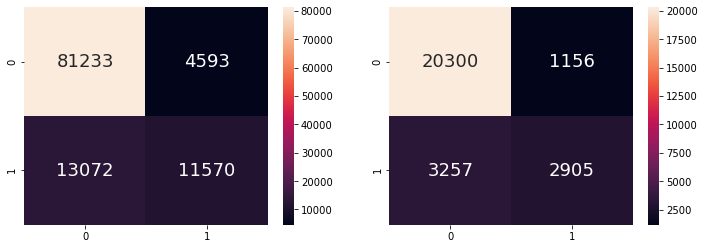

In [111]:
# Train the model with hyperparemeters obtained from GridSearch

#dectree = DecisionTreeClassifier(max_depth=6                
#                                ,min_samples_leaf=17         
#                                ,random_state=5
#                                ,max_features=80
#                                ,min_samples_split=2
#                                ,criterion='entropy'
                                
#                                    )
#dectree.fit(X_train,y_train)

# Predict RainTomorrow values 
#y_train_pred = dectree.predict(X_train)
#y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
#print("Goodness of Fit of Model \tTrain Dataset")
#print("Classification Accuracy \t:", dectree.score(X_train, y_train))
#print()

# Check the Goodness of Fit (on Test Data)
#print("Goodness of Fit of Model \tTest Dataset")
#print("Classification Accuracy \t:", dectree.score(X_test, y_test))
#print()

# Plot the Confusion Matrix for Train and Test
#f, axes = plt.subplots(1, 2, figsize=(12, 4))

#sb.heatmap(confusion_matrix(y_train, y_train_pred),
#           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
#sb.heatmap(confusion_matrix(y_test, y_test_pred),
#           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## 2.3 Conclusion for Decision Tree

<font color=darkblue> Compare the classfication accuracy of the decesion tree model on the test set by using different techniques of hyperparameters tuning:
> Learnig curve and Grid Search for the parameters respectively==>     84.4087189514085%       
> Grid Search for all the hyperparameters==>                   84.02129046274169% 

<font color=darkblue>***Thus, we decide to use the parameters listed below obtained from learnig curve and grid Search for the parameters respectively to train the decision tree model.***

In [114]:
dectree = DecisionTreeClassifier(max_depth=8                
                                ,min_samples_leaf=6         
                                ,random_state=5
                                ,max_features=96
                                ,criterion='entropy'
                                )
dectree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=96,
                       min_samples_leaf=6, random_state=5)

In [115]:
# Predict RainTomorrow values 
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8483633269363073

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.844087189514085



In [116]:
# Visualization of confusion matrix of test data (with summary statistics)

Reference:https://github.com/DTrimarchi10/confusion_matri
'''
>    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

>    Arguments
>    ------------

>    cf:            confusion matrix to be passed in

>    group_names:   List of strings that represent the labels row by row to be shown in each square.

>    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

>    count:         If True, show the raw number in the confusion matrix. Default is True.

>    normalize:     If True, show the proportions for each category. Default is True.

>    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

>    xyticks:       If True, show x and y ticks. Default is True.

>    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

>    sum_stats:     If True, display summary statistics below the figure. Default is True.

>    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

>    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
>    title:         Title for the heatmap. Default is None.


In [70]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=(10,10))
    sb.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

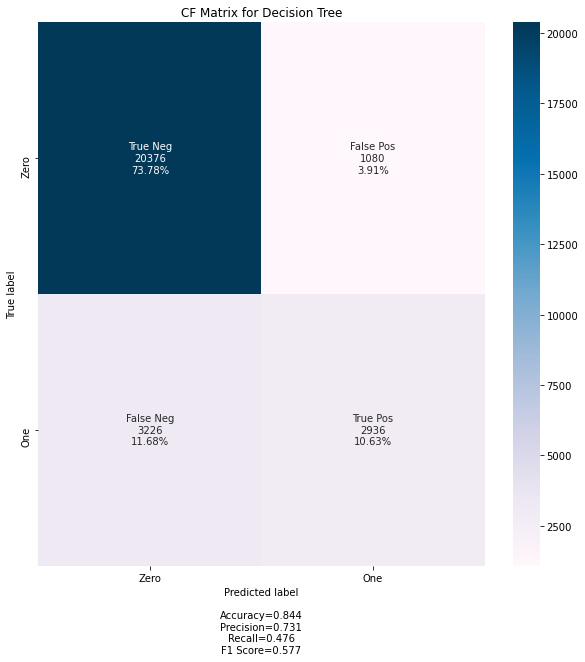

In [117]:
cf_matrix=confusion_matrix(y_test, y_test_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, cmap='PuBu', title='CF Matrix for Decision Tree')

# 3. Random Forest

In [60]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## 3.0 Contrast of decision Tree and Random Forest

<font color=blue>***In this part, we are going to briefly compare the classification accuracy of Decision Tree and Random Forest without parameter tuning to show Random Forest is more vigorous. We will still use cross_validation.***

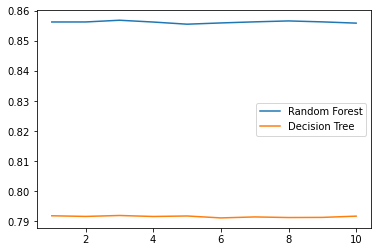

In [116]:
rfc_list = []
dectree_list = []
 
for i in range(10):
    # Create random forest object
    rfc = RandomForestClassifier()     
    
    rfc_s = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    rfc_list.append(rfc_s)
    
    # Create decision tree object
    dectree = DecisionTreeClassifier()
    
    dectree_s = cross_val_score(dectree,X_train,y_train,cv=10).mean()
    dectree_list.append(dectree_s)
    
plt.plot(range(1,11),rfc_list,label = "Random Forest")
plt.plot(range(1,11),dectree_list,label = "Decision Tree")
plt.legend()
plt.show()

<font color=blue>***Clearly, it is indicated that Random forest usually has a higher accuracy than Decision Tree.***

## 3.1 Train the model

In [150]:
rfc=RandomForestClassifier(random_state=50
                            ,n_estimators=30                 #Randomly select n_estimators for Random forest
                                                             #n_estimator(default=100)
                            # ,min_samples_leaf=2
                            #,min_samples_split=15 
                                 )                          #Create the Random Forest object
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30, random_state=50)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9986602455009596

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8556014193641828



<AxesSubplot:>

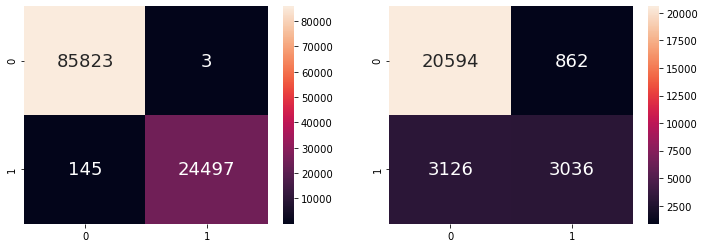

In [151]:
# Predict RainTomorrow values
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

<font color=blue>***Obviously, there still exists an issue of overfitting even when we use Random Forest.***</font>

In [154]:
# Check featuer importances

# Saving feature names for later use
feature_list = list(X_train.columns)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Feature: Humidity3pm                    Importance: 0.1214
Feature: Pressure3pm                    Importance: 0.0525
Feature: WindGustSpeed                  Importance: 0.0499
Feature: Sunshine                       Importance: 0.0485
Feature: Humidity9am                    Importance: 0.0482
Feature: Pressure9am                    Importance: 0.046
Feature: Temp3pm                        Importance: 0.0421
Feature: MinTemp                        Importance: 0.039
Feature: MaxTemp                        Importance: 0.0376
Feature: Cloud3pm                       Importance: 0.0372
Feature: Temp9am                        Importance: 0.0358
Feature: Rainfall                       Importance: 0.0339
Feature: Day                            Importance: 0.0289
Feature: WindSpeed3pm                   Importance: 0.028
Feature: WindSpeed9am                   Importance: 0.0267
Feature: Cloud9am                       Importance: 0.0248
Feature: Month                          Importance: 0.0219


## 3.2 Hyperparameter Tuning of Random Forest

<font color=darkblue>Due to the cost of time, we are not going to apply Grid Search for all the hyperparameters altogether. We decide to use various techniques to explore the optimized hyperparamters.The hyperparameters which we are going to tune are listed below with the corresponding techniques applied:
1. n_estimators (obb_score learning curve)
2. max_depth (oob-score learning curve)
3. min_samples_leaf (RandomizedSearchCV)
4. min_samples_split (RandomizedSearchCV)
5. max_features (GridSearch/RandomizedSearchCV/)

### 3.2.1 n_estimators (oob-score learning curve)

<font color=blue>***The parameter n_estimators is the number of trees in the forest. This parameter is monotonic.(i.e. the accuracy will keep increasing with the increase of n_estimators) While, it will eventually reach a certain value where the accuracy of the model begins flutuating mildly after that point. Thus, we decide to use learning curve to observe the trend of the accuracy with the increase of n_estimators.***</font>

<font color=darkred>Instead of using cross_validation to eliminate the influence to the split of the train and test set, we are going to use oob_score_(out of bag data) as the metrics to evaluate the performance of the model on the unknown data. This oob_score_ attribute comes from the characteristic of Random Forest which is bootstrap. All the decision trees are trained using different train sets which are drawn from the dataset with replacement. Thus, the idea of the oob_score is pretty much the same as cross validation. Both of them are used to minimise the generalization error. To speed up the searching of the optimized parameters. We use oob_score_.

0.8568001593221567 178


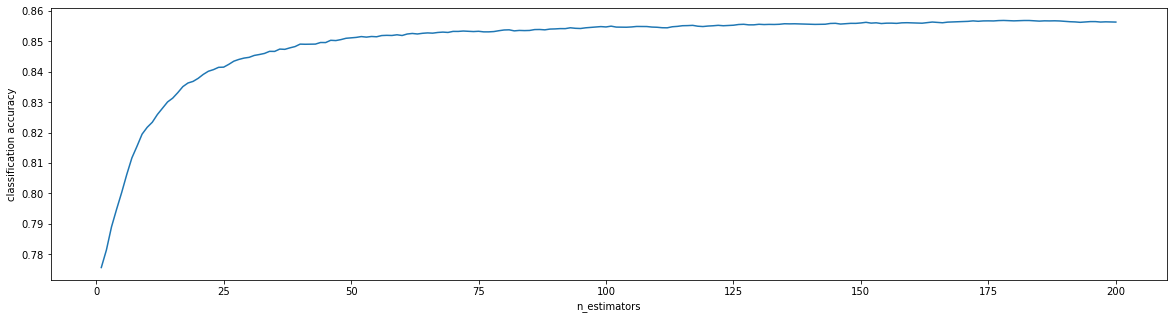

In [61]:
#####【TIME WARNING:1h】#####
superpa = []
for i in range(0,200):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=50
                                ,oob_score=True
                                ,n_jobs=-1)
    
    rfc.fit(X_train,y_train)
    rfc_s = rfc.oob_score_
    superpa.append(rfc_s)

print(max(superpa),superpa.index(max(superpa))+1)      
#print out：max(superpa)=maximum accuracy from list(superpa)
#print out：superpa.index(max(superpa))+1  is the value of n_estimators with the highest accuracy

# Plot the learning curve
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.xlabel('n_estimators')
plt.ylabel('classification accuracy')
plt.show()

<font color=blue>***Since the accuracy of the model begins stagnating after a certain value around 70 and n_estimator with highest accuracy appears at 178,we decide to use n_estimators=178 in the following models.***</font>

### 3.2.2 max_depth (oob_score learning curve)

<font color=blue>***As shown in 3.1, the model obtained without hyperparameter tuning has an issue with overfitting. Thus, it is reasonable to do prunig for the decision trees in the forests. We decide to use learnig curve to observe the trend of accuracy with various max_depth in order to get an optimized max_depth to limit the growth of the trees as well as to alleviate the issue of overfitting.***</font>

Highet Classification Accuracy 		: 0.8568001593221567
Corresponding Depth of the Tree 	: 61


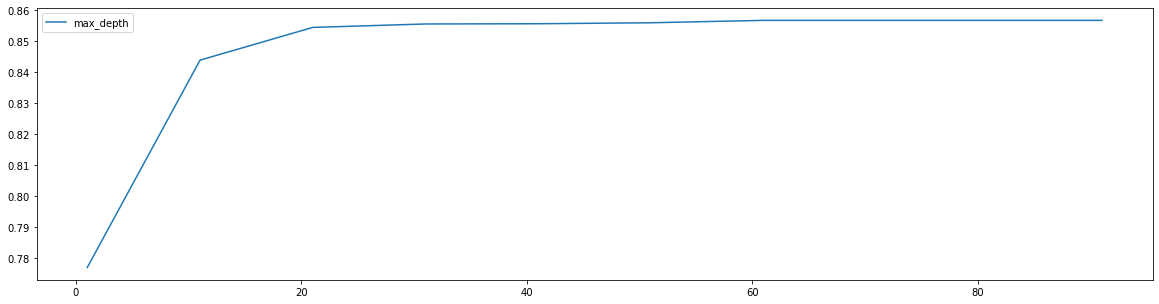

In [92]:
scorelist1 = []
for i in range(0,100,10):
    rfc = RandomForestClassifier(max_depth=i+1
                                ,random_state=50
                                ,n_estimators=178
                                ,oob_score=True
                                ,n_jobs=-1
                                )

    rfc.fit(X_train,y_train)
    score=rfc.oob_score_
    scorelist1.append(score)


    
print("Highet Classification Accuracy \t\t:",max(scorelist1))
print("Corresponding Number of the Trees \t:",(scorelist1.index(max(scorelist1))*10+1))
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),scorelist1,label="max_depth")
plt.legend()
plt.show()

Highet Classification Accuracy 		: 0.8568001593221567
Corresponding Depth of the Tree 	: 61


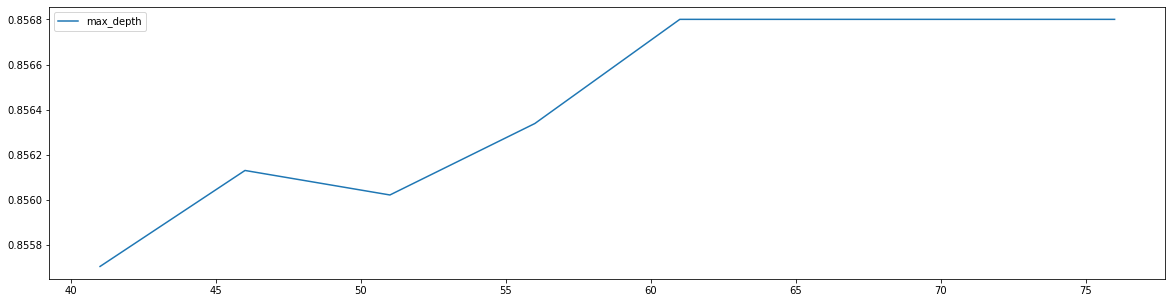

In [93]:
scorelist2 = []
for i in range(41,81,5):
    rfc = RandomForestClassifier(max_depth=i
                                ,random_state=50
                                ,n_estimators=178
                                ,oob_score=True
                                ,n_jobs=-1
                                )

    rfc.fit(X_train,y_train)
    score=rfc.oob_score_
    scorelist2.append(score)


    
print("Highet Classification Accuracy \t\t:",max(scorelist2))
print("Corresponding Depth of the Tree \t:",(scorelist2.index(max(scorelist2))*5+41))
plt.figure(figsize=[20,5])
plt.plot(range(41,81,5),scorelist2,label="max_depth")
plt.legend()
plt.show()

<font color=blue>***Since the accuracy of the model is the same as the accuracy before we tune max_depth,tuning max_depth is not able to improve the accuracy.***</font>

### 3.2.3 min_samples_leaf (RandomizedSearchCV)

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [94]:
#####【TIME WARNING:30min】#####
parameters_grid1 ={'min_samples_leaf':[int(x) for x in np.linspace(1,100,10)]}
rfc = RandomForestClassifier(max_depth=61
                            ,random_state=50
                            ,n_estimators=178
                            ,n_jobs=-1
                            )

GS = RandomizedSearchCV(rfc,parameters_grid1,cv=10,n_jobs=-1)
GS.fit(X_train,y_train)

print(GS.best_params_)
print(GS.best_score_)
#GS.cv_results_

{'min_samples_leaf': 1}
0.8569630884817018


{'mean_fit_time': array([145.78074529, 121.5689008 , 110.87597387, 106.12641323,
        100.19344556,  96.50159926,  96.20746362,  97.37115064,
         94.5545125 ,  75.40004129]),
 'std_fit_time': array([ 6.2697544 ,  4.23508159,  2.32382131,  2.01604544,  2.25047965,
         1.71898643,  1.26936571,  1.53767099,  1.88243324, 23.25091781]),
 'mean_score_time': array([2.64185824, 3.72141879, 3.13624003, 1.96307471, 2.07531917,
        1.93565545, 1.85782003, 1.59663112, 1.8872719 , 0.92264562]),
 'std_score_time': array([1.85924529, 1.54191351, 1.58999606, 1.63517457, 1.81809381,
        1.11079712, 1.32102969, 1.6027429 , 1.74690847, 0.76476006]),
 'param_min_samples_leaf': masked_array(data=[1, 12, 23, 34, 45, 56, 67, 78, 89, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_leaf': 1},
  {'min_samples_leaf': 12},
  {'min_samples_leaf': 23

<font color=blue>***We decide to use min_samples_leaf=1(default) in the following models.***</font>

### 3.2.4 min_samples_split (RandomizedSearchCV)

In [101]:
#####【TIME WARNING:30min】#####
parameters_grid2 ={'min_samples_split':[int(x) for x in np.linspace(2,50,20)]}

rfc = RandomForestClassifier(max_depth=61
                            ,random_state=50
                            ,n_estimators=178
                            ,min_samples_leaf=1                        
                            ,n_jobs=-1
                            )

GS = RandomizedSearchCV(rfc,parameters_grid2,cv=10,n_jobs=-1)
GS.fit(X_train,y_train)

print(GS.best_params_)
print(GS.best_score_)
#GS.cv_results_

{'min_samples_split': 2}
0.8569630884817018


{'mean_fit_time': array([131.69750712, 132.79408379, 130.61598029, 131.46534109,
        140.11448624, 147.91125271, 139.25969107, 138.72540541,
        132.40833483, 120.91064391]),
 'std_fit_time': array([ 1.70939554,  2.10196918,  1.72547495,  2.09366234,  2.05405257,
         0.8162269 ,  3.5673326 ,  2.24786657,  1.49916217, 29.51238923]),
 'mean_score_time': array([2.53537786, 1.94677935, 2.30941918, 2.57254663, 3.7079495 ,
        2.05006239, 3.87334857, 3.51893618, 4.44726417, 2.64074352]),
 'std_score_time': array([1.7580634 , 1.62513705, 1.25989263, 1.93038707, 2.57607916,
        0.75507256, 1.97375169, 1.80141033, 2.39966005, 1.4191113 ]),
 'param_min_samples_split': masked_array(data=[32, 29, 42, 37, 9, 2, 50, 44, 27, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_split': 32},
  {'min_samples_split': 29},
  {'min_samples_split': 

<font color=blue>***We decide to use min_samples_split=2(default) in the following models.***</font>

### 3.2.5 max_feature(GridSearch/learnig curve)

In [104]:
# First, we will do GridSearch with paramters range{None,auto,log2}
# None: max_feature=n_feature In our dataset, n_feature=118
# auto(default): max_feature=sqrt(n_feature) approximately equal to 11
# log2: max_feature=log2(n_feature) approximately equal to 7

parameters_grid3 ={'max_features':[None,'auto','log2']}
rfc = RandomForestClassifier(max_depth=61
                            ,random_state=50
                            ,n_estimators=178
                            ,min_samples_leaf=1
                            ,min_samples_split=2
                            ,n_jobs=-1
                            )

GS = GridSearchCV(rfc,parameters_grid3,cv=10,n_jobs=-1)
GS.fit(X_train,y_train)

print(GS.best_params_)
print(GS.best_score_)
#GS.cv_results_

{'max_features': None}
0.8573070888445121


{'mean_fit_time': array([1076.67279553,  142.6232832 ,   99.55451603]),
 'std_fit_time': array([231.39757762,   2.83312712,  18.74118786]),
 'mean_score_time': array([1.54370053, 5.53283257, 6.78603041]),
 'std_score_time': array([0.78511862, 1.257803  , 2.30886206]),
 'param_max_features': masked_array(data=[None, 'auto', 'log2'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': None},
  {'max_features': 'auto'},
  {'max_features': 'log2'}],
 'split0_test_score': array([0.85199602, 0.85398751, 0.85335385]),
 'split1_test_score': array([0.85706527, 0.8543496 , 0.8543496 ]),
 'split2_test_score': array([0.86068616, 0.86249661, 0.85860415]),
 'split3_test_score': array([0.85887571, 0.85878519, 0.85489273]),
 'split4_test_score': array([0.8567937 , 0.85588848, 0.85507378]),
 'split5_test_score': array([0.855979  , 0.85643161, 0.85389699]),
 'split6_test_score': array([0.85987146, 0.85778945, 0.85769892]),
 'split7_t

<font color=blue>***As stated before, the default for max_features is 'auto' which is about 11 features for our dataset and if max_features=None, every estimator(decision tree) in Rnadom Forest will consider n_features(118) when spliting. However, the accuracy of the model with max_features=None is greater than the acciracy when that is 'auto'. It indicates that the model before we tune max_features is  underfitting. The increase of the features will increase the complexity of the model and hence reduce the bias error.***</font>

<font color=blue>***To find a more appropriate value,we decide to exploit learning curve to study the trend of the accuracy with max_features increasing from 11(default).***

Highet Classification Accuracy 		: 0.8585291589287134
Corresponding Number of features 	: 61


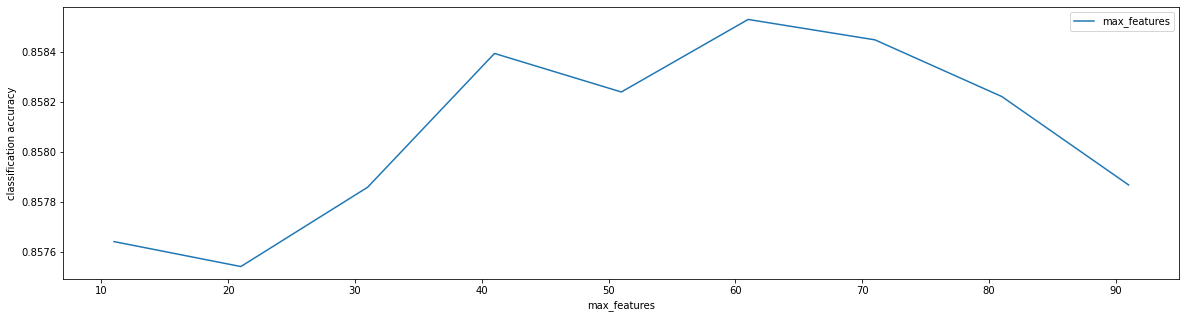

In [124]:
scorelist3 = []
for i in range(11,101,10):
    rfc = RandomForestClassifier(max_depth=61
                                ,random_state=50
                                ,n_estimators=178
                                ,min_samples_leaf=1
                                ,min_samples_split=2 
                                #,oob_score=True
                                ,max_features=i
                                ,n_jobs=-1
                                )

    
    score=cross_val_score(rfc,X_train,y_train,cv=10).mean()                             #cv=10 cross validation 10 times
    scorelist3.append(score)
                          

    
print("Highet Classification Accuracy \t\t:",max(scorelist3))
print("Corresponding Number of features \t:",(scorelist3.index(max(scorelist3))*10+11))
plt.figure(figsize=[20,5])
plt.plot(range(11,101,10),scorelist3,label="max_features")
plt.legend()
plt.xlabel('max_features')
plt.ylabel('classification accuracy')
plt.show()

<font color=blue>***Initially, when max_feature='auto'(11), the model is underfitting. The accuracy grows as a result of increasing features for the bias error is reduced. After a certain value around 64, the accuracy begins declining which suggests the overfitting is getting more and more evident. We decide to use max_features=61(default) in the following models.***

## 3.2.5 RandomizedSearchCV for all the hyperparameters 

<font color=darkred>***Due to the huge amout of computation and the cost of time, it is not suggested to use Grid Search for all the hyperparameters at the same time***</font>

In [65]:
#####【TIME WARNING:7h】#####
rfc_grid = {'n_estimators':[int(x) for x in np.linspace(168,188,3)],
            'max_depth':[int(x) for x in np.linspace(58,73,3)],
            'max_features':[int(x) for x in np.linspace(51,71,3)],
            'criterion':['gini','entropy'],
            'min_samples_leaf':[int(x) for x in np.linspace(1,20,3)],
            'min_samples_split':[int(x) for x in np.linspace(2,10,2)],
            }

rfc = RandomForestClassifier(random_state=50
                            ,n_jobs=-1
                            )

GS = RandomizedSearchCV(rfc,rfc_grid,cv=10,n_jobs=-1)
GS.fit(X_train,y_train)

print(GS.best_params_)
print(GS.best_score_)
#GS.cv_results_

{'n_estimators': 188, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 71, 'max_depth': 73, 'criterion': 'gini'}
0.8584748479989726


## 3.3 Conclusion for Random Forest

<font color=darkblue>***Finally, we decide to use the parameters listed below obtained from learnig curve and grid Search for the parameters respectively to train the random forest model.***

In [66]:
rfc = RandomForestClassifier(max_depth=61
                            ,random_state=50
                            ,n_estimators=178
                            ,min_samples_leaf=1
                            ,min_samples_split=2 
                            #,oob_score=True
                            ,max_features=61
                            ,n_jobs=-1
                            )

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=61, max_features=61, n_estimators=178,
                       n_jobs=-1, random_state=50)

In [67]:
# Predict RainTomorrow values 
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8593670794409443



In [68]:
# Visualization of confusion matrix of test data (with summary statistics)

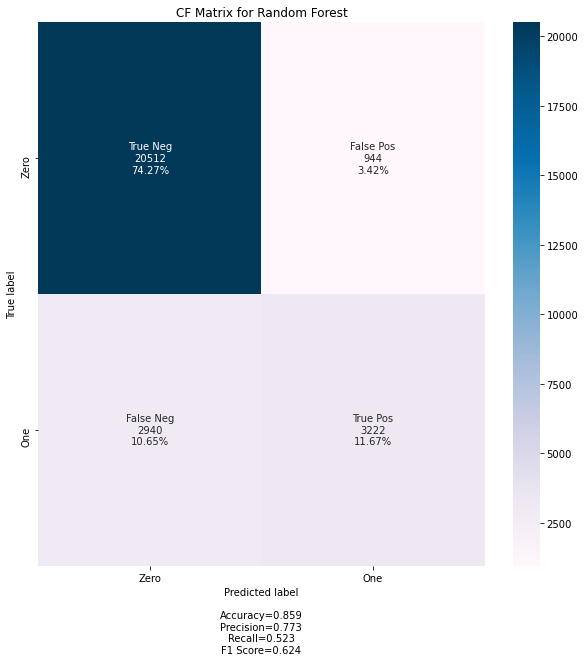

In [71]:
cf_matrix=confusion_matrix(y_test, y_test_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, cmap='PuBu', title='CF Matrix for Random Forest')